In [1]:
## Importing all the necessray libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import joblib
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder

In [2]:
## Defining the folder paths
data_path = '../Data/'
model_path = '../Model/'
transformation_path = '../Transformation/'
visualisation_path = '../Visualisation/'
notebook_path = '../Notebook/'
output_path = '../Output/'

In [3]:
os.getcwd()

'C:\\Users\\mosakue\\Desktop\\PYTHON_CLASS_MATERIALS\\FLOOD_ML_PROJECT\\Notebook'

In [4]:
os.chdir(data_path)
os.getcwd()

'C:\\Users\\mosakue\\Desktop\\PYTHON_CLASS_MATERIALS\\FLOOD_ML_PROJECT\\Data'

In [ ]:
Loading the dataset to be used

In [9]:
cleaned_smote_enn =  pd.read_csv('cleaned_smote_enn.csv')
cleaned_smote_enn.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,0.007426,0.219418,0.275840,0.429820,0.119282,0.352463,0.070317,0.342182,0.178709,0.316026,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.007317,0.259408,0.250529,0.425634,0.131978,0.384994,0.066682,0.325081,0.161624,0.311352,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.007198,0.297754,0.248572,0.416623,0.078811,0.386203,0.055548,0.331676,0.181730,0.306323,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.014783,0.174709,0.311005,0.423410,0.020173,0.335552,0.073084,0.291919,0.307785,0.314539,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.014063,0.207753,0.250973,0.413229,0.104999,0.384507,0.066578,0.416557,0.169208,0.299224,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [10]:
list(cleaned_smote_enn.columns)

['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period',
 'Station_Names_Barisal',
 'Station_Names_Bhola',
 'Station_Names_Bogra',
 'Station_Names_Chandpur',
 'Station_Names_Chittagong (City-Ambagan)',
 'Station_Names_Chittagong (IAP-Patenga)',
 'Station_Names_Comilla',
 "Station_Names_Cox's Bazar",
 'Station_Names_Dhaka',
 'Station_Names_Dinajpur',
 'Station_Names_Faridpur',
 'Station_Names_Feni',
 'Station_Names_Hatiya',
 'Station_Names_Ishurdi',
 'Station_Names_Jessore',
 'Station_Names_Khepupara',
 'Station_Names_Khulna',
 'Station_Names_Kutubdia',
 'Station_Names_Madaripur',
 'Station_Names_Maijdee Court',
 'Station_Names_Mongla',
 'Station_Names_Mymensingh',
 'Station_Names_Patuakhali',
 'Station_Names_Rajshahi',
 'Station_Names_Rangamati',
 'Station_Names_Rangpur',
 'Station_Names_Sandwip',
 'Station_Names_Satkhira',
 '

In [11]:
features_enn = cleaned_smote_enn[['Year',
 'Month',
 'Max_Temp',
 'Min_Temp',
 'Rainfall',
 'Relative_Humidity',
 'Wind_Speed',
 'Cloud_Coverage',
 'Bright_Sunshine',
 'Station_Number',
 'X_COR',
 'Y_COR',
 'LATITUDE',
 'LONGITUDE',
 'ALT',
 'Period',
 'Station_Names_Barisal',
 'Station_Names_Bhola',
 'Station_Names_Bogra',
 'Station_Names_Chandpur',
 'Station_Names_Chittagong (City-Ambagan)',
 'Station_Names_Chittagong (IAP-Patenga)',
 'Station_Names_Comilla',
 "Station_Names_Cox's Bazar",
 'Station_Names_Dhaka',
 'Station_Names_Dinajpur',
 'Station_Names_Faridpur',
 'Station_Names_Feni',
 'Station_Names_Hatiya',
 'Station_Names_Ishurdi',
 'Station_Names_Jessore',
 'Station_Names_Khepupara',
 'Station_Names_Khulna',
 'Station_Names_Kutubdia',
 'Station_Names_Madaripur',
 'Station_Names_Maijdee Court',
 'Station_Names_Mongla',
 'Station_Names_Mymensingh',
 'Station_Names_Patuakhali',
 'Station_Names_Rajshahi',
 'Station_Names_Rangamati',
 'Station_Names_Rangpur',
 'Station_Names_Sandwip',
 'Station_Names_Satkhira',
 'Station_Names_Sitakunda',
 'Station_Names_Srimangal',
 'Station_Names_Sylhet',
 'Station_Names_Tangail',
 'Station_Names_Teknaf',]]

target_enn = cleaned_smote_enn[['Flood']]

In [12]:
from imblearn.combine import SMOTEENN

smote_enn = SMOTEENN()
smote_enn

SMOTEENN()

In [13]:
feat_smote_enn, target_smote_enn = smote_enn.fit_resample(features_enn, target_enn)

In [14]:
smote_enn_df = pd.concat([feat_smote_enn, target_smote_enn], axis=1)
smote_enn_df.head()

,Year,Month,Max_Temp,Min_Temp,Rainfall,Relative_Humidity,Wind_Speed,Cloud_Coverage,Bright_Sunshine,Station_Number,...,Station_Names_Rangamati,Station_Names_Rangpur,Station_Names_Sandwip,Station_Names_Satkhira,Station_Names_Sitakunda,Station_Names_Srimangal,Station_Names_Sylhet,Station_Names_Tangail,Station_Names_Teknaf,Flood
0,0.335302,0.335818,0.199542,0.276628,0.022642,0.275584,0.029684,0.116899,0.241789,0.353455,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.347405,0.382734,0.152069,0.197484,0.000000,0.230856,0.034173,0.072671,0.253996,0.366213,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.383002,0.000000,0.155595,0.185672,0.003004,0.256855,0.029637,0.057774,0.279128,0.397009,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.377353,0.037164,0.178850,0.192266,0.009865,0.214133,0.040150,0.051747,0.330756,0.391153,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.335519,0.297392,0.219061,0.308708,0.032278,0.271167,0.029208,0.138030,0.254435,0.347789,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# smote_enn_df_array = smote_enn_df.values

In [16]:
X = smote_enn_df.drop(columns = ['Flood'], axis=1)
y = smote_enn_df['Flood']

In [ ]:
# X = smote_enn_df_array[:, :-1]
# y = smote_enn_df_array[:, -1]

In [17]:
seed=40
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

# USING DECISION TREES MODEL

In [18]:
pip install scikit-learn

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, classification_report

In [21]:
DecisionTC = DecisionTreeClassifier(random_state=40)
DecisionTC

DecisionTreeClassifier(random_state=40)

In [22]:
DecisionTC.fit(X_train, y_train)

DecisionTreeClassifier(random_state=40)

In [23]:
y_pred =DecisionTC.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [24]:
score = DecisionTC.score(X_test, y_test)
score

0.998259139517533

# Confusion matrix

In [25]:
from sklearn.metrics import confusion_matrix

In [26]:
conf_mat = confusion_matrix(y_pred, y_test)
conf_mat

array([[2024,    5],
       [   2, 1990]], dtype=int64)

Text(220.72222222222223, 0.5, 'Predicted Values')

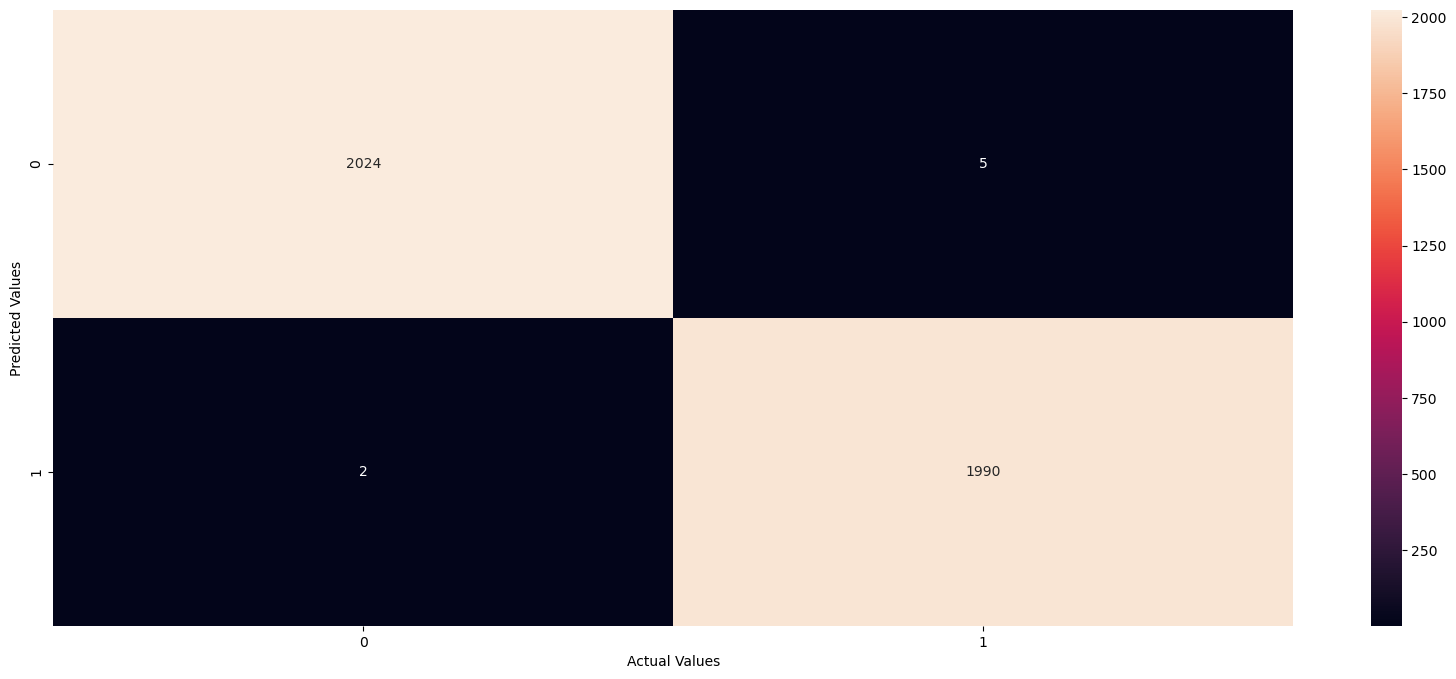

In [27]:
plt.figure(figsize=(20, 8))
sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [28]:
from sklearn.metrics import accuracy_score

In [29]:
acc_score = accuracy_score(y_pred, y_test)
acc_score

0.998259139517533

In [30]:
from sklearn.metrics import precision_score

In [31]:
prec = precision_score(y_pred, y_test)
prec 

0.9974937343358395

In [32]:
from sklearn.metrics import recall_score

In [33]:
recall = recall_score(y_pred, y_test)
recall

0.998995983935743

In [34]:
from sklearn.metrics import f1_score

In [35]:
f1 = f1_score(y_pred, y_test)
f1

0.9982442939553549

In [36]:
from sklearn.metrics import roc_curve, roc_auc_score

In [38]:
probs =  DecisionTC.predict_proba(X_test)
probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])

In [39]:
fpr, tpr, thresholds = roc_curve(y_test, probs[:, 1])
auc_score = roc_auc_score(y_test, probs[:, 1])

In [40]:
fpr

array([0.00000000e+00, 9.87166831e-04, 1.00000000e+00])

In [41]:
tpr

array([0.        , 0.99749373, 1.        ])

In [42]:
thresholds

array([inf,  1.,  0.])

In [43]:
auc_score

0.9982532837523226

# USING SUPPORT VECTOR MACHINE (SVC)

In [44]:
X = smote_enn_df.drop(columns = ['Flood'], axis=1)
y = smote_enn_df['Flood']

In [45]:
seed=40
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [46]:
## Import the model

from sklearn.svm import SVC

In [47]:
svc = SVC(kernel='linear', random_state=42)
svc

SVC(kernel='linear', random_state=42)

In [48]:
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [49]:
y_pred =svc.predict(X_test)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [50]:
score = svc.score(X_test, y_test)
score

0.9828400895299677

In [51]:
conf_mat = confusion_matrix(y_pred, y_test)
conf_mat

array([[2018,   61],
       [   8, 1934]], dtype=int64)

Text(220.72222222222223, 0.5, 'Predicted Values')

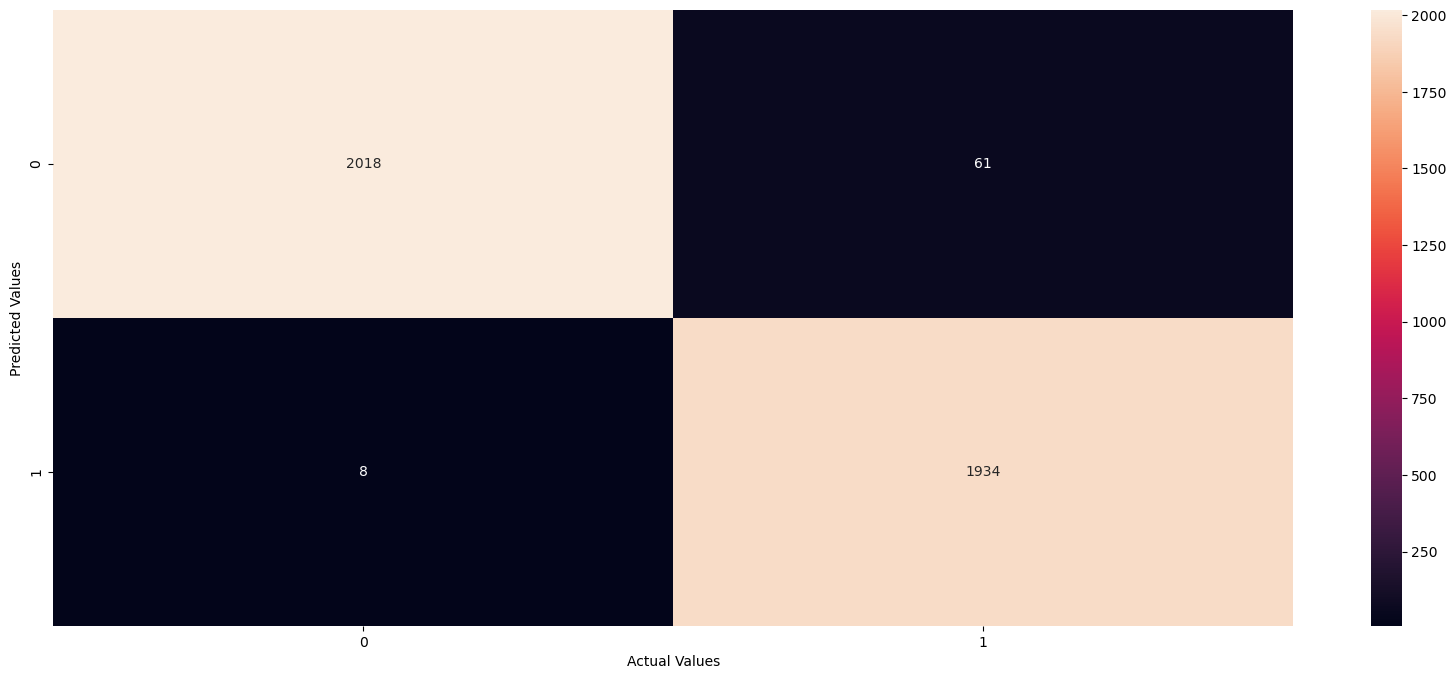

In [52]:
plt.figure(figsize=(20, 8))
sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [53]:
acc_score = accuracy_score(y_pred, y_test)
acc_score

0.9828400895299677

In [54]:
prec = precision_score(y_pred, y_test)
prec 

0.9694235588972431

In [55]:
recall = recall_score(y_pred, y_test)
recall

0.995880535530381

In [56]:
f1 = f1_score(y_pred, y_test)
f1

0.9824739649479299

# USING KNN CLASSIFIER

In [62]:
X = smote_enn_df.drop(columns = ['Flood'], axis=1)
y = smote_enn_df['Flood']

In [63]:
seed=40
test_size=0.1
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)

In [60]:
from sklearn.neighbors import KNeighborsClassifier

In [72]:
knn = KNeighborsClassifier(n_neighbors=4)
knn

KNeighborsClassifier(n_neighbors=4)

In [73]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [74]:
knn_y_pred =knn.predict(X_test)
knn_y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [75]:
knn_score = knn.score(X_test, y_test)
knn_score

0.9992539169360856

In [76]:
knn_conf_mat = confusion_matrix(y_pred, y_test)
knn_conf_mat

array([[2018,   61],
       [   8, 1934]], dtype=int64)

Text(220.72222222222223, 0.5, 'Predicted Values')

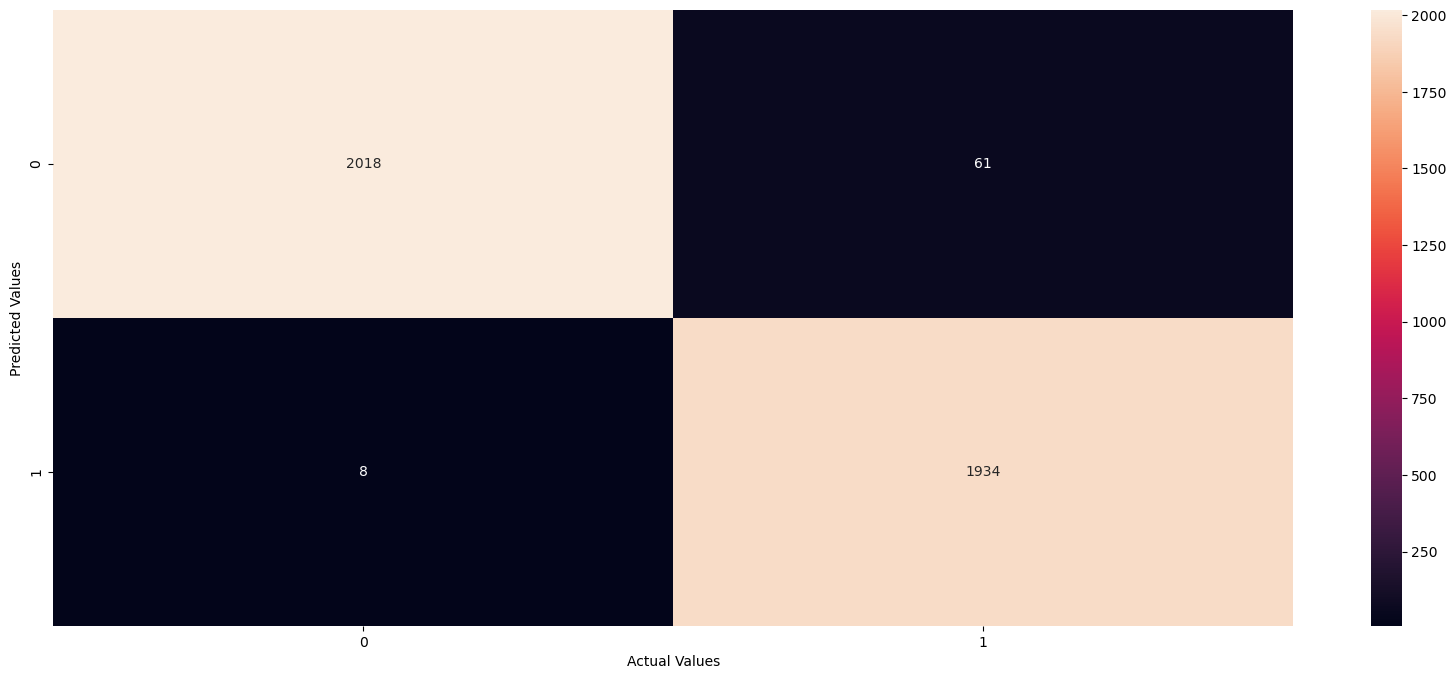

In [77]:
plt.figure(figsize=(20, 8))
sb.heatmap(conf_mat, annot=True, fmt='d')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [78]:
knn_acc_score = accuracy_score(y_pred, y_test)
knn_acc_score

0.9828400895299677

In [79]:
knn_prec = precision_score(y_pred, y_test)
knn_prec 

0.9694235588972431

In [80]:
knn_recall = recall_score(y_pred, y_test)
knn_recall

0.995880535530381

In [81]:
knn_f1 = f1_score(y_pred, y_test)
knn_f1

0.9824739649479299

In [82]:
knn_probs =  DecisionTC.predict_proba(X_test)
knn_probs

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]])